# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries


# when we perform hypothiess testing 

Ye line 100% correct and conceptually solid hai ✅

Agar question me aise keywords milte hain —
“difference”, “relationship”, “impact”, “effect”, “compare”, “influence”
→ To samjho Hypothesis Testing lagta hai. 💯

How to Identify When to Use Hypothesis Testing

As a Data Analyst learner, one common question I had was —
👉 "How do I know if a question requires hypothesis testing?"

After working on several projects, here’s the golden rule I follow 👇

🔹 If a question includes words like
“difference”, “relationship”, “impact”, “effect”, “compare”, “influence”
→ It’s a clear signal that Hypothesis Testing is required. 💯

These words indicate that we are trying to prove or disprove a claim —
and that’s exactly what hypothesis testing is designed for!

📊 Examples:

“Is there a difference between cash and card fares?” → t-test

“Does payment type impact total fare?” → t-test / ANOVA

“Is there a relationship between gender and payment type?” → Chi-square

⚖️ Z-Test vs T-Test (Bonus Learning)
Feature	Z-Test	T-Test
When to use	Population variance known	Population variance unknown
Sample size	n > 30 (Large)	n < 30 (Small/Medium)
Common in real projects?	Rarely	Very common
Example	Compare sample mean to population mean	Compare two sample means (e.g., Cash vs Card fare)

👉 In most real-world data analysis cases, we don’t know the population variance,
so T-test is preferred over Z-test. ✅

🧩 Quick Tip:
Data Type	Recommended Test
Both categorical	Chi-Square
Both numerical	Correlation / Regression
One categorical + one numerical	T-Test / ANOVA

💬 What’s one hypothesis test you recently used in your project?
Let’s discuss in the comments 👇

#DataAnalytics #HypothesisTesting #Statistics #ZTest #TTest #ABTesting #DataScience #LearningJourney #Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

#### waring is use to remove or ignore 

# Loading the  data set

In [2]:
import pandas as pd

df = pd.read_csv("taxi.csv", nrows=500000)

df.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


observation   18 row and 500000 column

# GENERAL
REALITY HOTA KYA JO APKO DATASET VO APKO POPLUTION HOTA HAI but apko anyliese krne ke liye uska 20% hi karna padta hai based on problem requiment

Exploratory Data anylises

In [3]:
df.shape

(500000, 18)

#data set dictionary

![Data Dictionary](desc.png)


# last column not mention in image
  Airport_fee — $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

# which column affect fare amount 
1 distance 

second we to create by feature enginering by combining two column first  picup time and drop time make them new column  called duration column

2 duration =picup time - drop time



In [4]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

# observation  
tpep_pickup_datetime      object
tpep_dropoff_datetime     object

both are object we have to convert it into date and time type

In [5]:
df["tpep_pickup_datetime"]=pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"]=pd.to_datetime(df["tpep_dropoff_datetime"])

In [6]:
df["duration"]=df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]
# make in min
df["duration"]=df["duration"].dt.total_seconds()/60



# imp
jo jo imp column hai usko filter(list of colum) or jo unimp hai ussee drop kr 

filer
df[["duration","trip_distance","fare_amount","payment_type"]]

drop
df.drop(column=[])

In [7]:
df=df[["duration","trip_distance","fare_amount","payment_type","passenger_count"]]

In [8]:
df.head()

,duration,trip_distance,fare_amount,payment_type,passenger_count
0,4.800000,1.2,6.0,1,1
1,7.416667,1.2,7.0,1,1
2,6.183333,0.6,6.0,1,1
3,4.850000,0.8,5.5,1,1
4,2.300000,0.0,3.5,2,1


# now data cleaning is start 

In [9]:
df.isnull().sum()

duration           0
trip_distance      0
fare_amount        0
payment_type       0
passenger_count    0
dtype: int64

suppose kr meko duration me 45k data null milta hai to may kya drop karu usko ki backend team se contact karu
best hai percentage to total data se kese

45k/len(df) *100
 
 resiult 1  to 5 percneatge b/w aya means drop kr do best yeh hai

 df.dropna(inpalce =True)

 

check wheter payment type and pasanger count ko int me convert kr

and check duplicate is exit or not if duplicate is exit remove duplicate

# check duplicate is exit or not if yes drop duplicate


In [10]:
df.duplicated().sum()


np.int64(93489)

hua jo unimported column nikala jo vendor id hoty (primary key ) usko remove kr diya jiske vajese  data duplicate hote nahi jo imp column usse data nikala bss uska duplicate 

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(406511, 5)

total 93,489 data is remove which is duplicated

# now payment type and pasanger count  kese impact krte hai fare amount

In [12]:
df["passenger_count"].unique()

array([1, 4, 2, 3, 6, 5, 0, 8, 7, 9])

mean only number hai only
# value count using percentage taki pata chl sake ki kitna impact pada 

In [13]:
df["passenger_count"].value_counts(normalize=True)

passenger_count
1    0.620738
2    0.191498
3    0.059858
5    0.045000
4    0.036275
6    0.027362
0    0.019247
8    0.000012
7    0.000005
9    0.000005
Name: proportion, dtype: float64

In [14]:
df["payment_type"].unique()


array([1, 2, 4, 3])

In [15]:
df["payment_type"].value_counts(normalize=True)

payment_type
1    0.634347
2    0.354812
3    0.006802
4    0.004039
Name: proportion, dtype: float64

observation  passenger count 0,8,7,9 ,6 does not affect  so remove that

observation  payemnt type max peoplr do cash and card means payment type  pay one and two payment type

perform filter

In [16]:
df=df[df["payment_type"]<3]
df=df[(df["passenger_count"]>0)&(df["passenger_count"]<6)]

In [17]:
df.shape

(383402, 5)

NOW I WILL PAYMENT TYPE BY CARD AND CASH


In [18]:
df["payment_type"]=df["payment_type"].replace({1:"Card",2:"Cash"})
df

,duration,trip_distance,fare_amount,payment_type,passenger_count
0,4.800000,1.20,6.0,Card,1
1,7.416667,1.20,7.0,Card,1
2,6.183333,0.60,6.0,Card,1
3,4.850000,0.80,5.5,Card,1
4,2.300000,0.00,3.5,Cash,1
...,...,...,...,...,...
499991,15.050000,2.57,12.0,Cash,2
499995,6.150000,0.97,6.0,Cash,1
499997,6.883333,0.92,6.0,Cash,1
499998,13.583333,2.42,11.0,Card,1


In [19]:
df.describe()


,duration,trip_distance,fare_amount,passenger_count
count,383402.000000,383402.000000,383402.000000,383402.000000
mean,18.469668,3.693100,14.749587,1.631045
std,78.398240,4.516053,13.883785,1.075595
min,0.000000,-0.880000,-110.000000,1.000000
25%,7.133333,1.160000,7.000000,1.000000
50%,11.716667,2.020000,10.000000,1.000000
75%,18.266667,3.990000,16.500000,2.000000
max,2458.400000,110.510000,1238.000000,5.000000


df["fare_amount"].describe()

In [20]:
df[["fare_amount","trip_distance","duration","passenger_count"]].describe()

,fare_amount,trip_distance,duration,passenger_count
count,383402.000000,383402.000000,383402.000000,383402.000000
mean,14.749587,3.693100,18.469668,1.631045
std,13.883785,4.516053,78.398240,1.075595
min,-110.000000,-0.880000,0.000000,1.000000
25%,7.000000,1.160000,7.133333,1.000000
50%,10.000000,2.020000,11.716667,1.000000
75%,16.500000,3.990000,18.266667,2.000000
max,1238.000000,110.510000,2458.400000,5.000000


Fare Amount ($):

Min -$110, Avg $14.7, Max $1238.0 → Few negative or outlier fares, most rides are affordable city trips.

👿 Min  -$110 is wrong


Trip Distance (miles):

Min -0.88 miles, Avg 3.69 miles, Max 110.51 miles → Mostly short-distance city rides, few long trips.

👿 trip distance minimum is wrong  =-0.88 miles

Duration (minutes):

Min 0 min, Avg 18.46 min, Max 2458.4 min  → Typical trips under 22 min, few invalid long records.

Passenger Count:

Min 1, Avg 1.6, Max 5 → Mostly single or two-passenger trips.

observation:as we see that  fare amount column  is -Ve minum value
observation:as we see that  trip distance column  is -Ve minum value

mean their is wrong data exist inside fare amount
mean their is wrong data exist inside trip distance

In [21]:
df=df[df["fare_amount"]>0]
df=df[df["trip_distance"]>0]
df.shape

(379922, 5)

In [22]:
df.describe()

,duration,trip_distance,fare_amount,passenger_count
count,379922.000000,379922.000000,379922.000000,379922.000000
mean,18.474629,3.723901,14.579722,1.632188
std,78.197491,4.521032,13.324914,1.076641
min,0.000000,0.010000,0.010000,1.000000
25%,7.200000,1.180000,7.000000,1.000000
50%,11.750000,2.040000,10.000000,1.000000
75%,18.266667,4.000000,16.000000,2.000000
max,2458.400000,110.510000,1238.000000,5.000000


Fare Amount ($):
Min $0, Avg $14.7, Max $1238.0 → Few negative or outlier fares, most rides are affordable city trips.




Trip Distance (miles):
Min 0. miles, Avg 3.69 miles, Max 110.51 miles → Mostly short-distance city rides, few long trips.



Duration (minutes):
Min 0 min, Avg 18.46 min, Max 2458.4 min  → Typical trips under 22 min, few invalid long records.

Passenger Count:
Min 1, Avg 1.6, Max 5 → Mostly single or two-passenger trips.

CHECK OUTLIERS OF FOUR VARIBLE
by using box wisker plot



Axes(0.125,0.11;0.775x0.77)


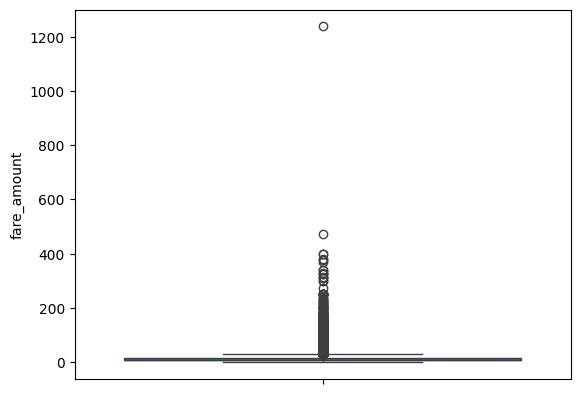

In [23]:
print(sns.boxplot(df["fare_amount"]))


<Axes: ylabel='trip_distance'>

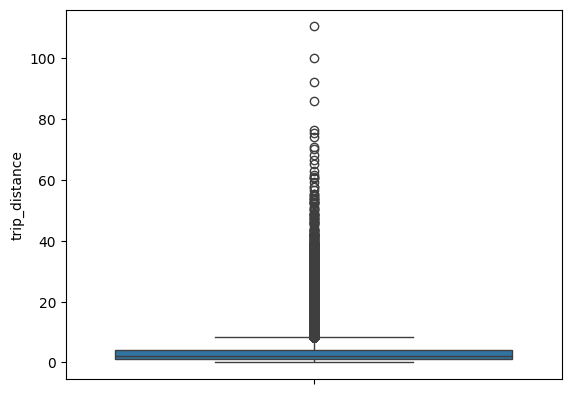

In [24]:
sns.boxplot(df["trip_distance"])


<Axes: ylabel='duration'>

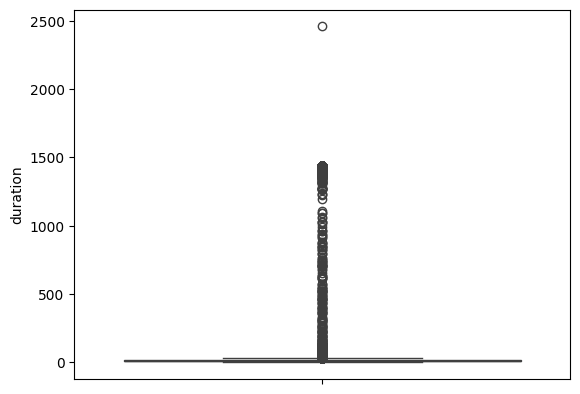

In [25]:
sns.boxplot(df["duration"])

# observation
as we see that all three column have outlier is exsit

Outliers handle karne ke 2 main steps:

IQR Method → remove or cap extreme values.

Transformations → to make data more normally distributed

Log Transformation (for right-skewed data)

Exponential / Square Root / Box-Cox Transformation (for left or mixed skew)

In [26]:
# IQR Method to handle outliers
cols = ["duration", "trip_distance", "fare_amount"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower) & (df[col] <= upper)]


  

now all outliesr is remove



In [27]:
df.shape

(320758, 5)

#after that we got 320758 data

In [28]:
df["payment_type"].describe()

count     320758
unique         2
top         Card
freq      202952
Name: payment_type, dtype: object

# now  we will se that according to the fare amount and payment type  kya customer prefer krte hai card se payment or cash payment
#if amount bada to customer kya prefer krta hai  vo dekhege

# Yes Tarun ✅ — absolutely right.

You have ~3 lakh rows, so estimator=sum will make Seaborn aggregate all rows, which takes time.

👉 To make it fast, do aggregation first with pandas, then plot:



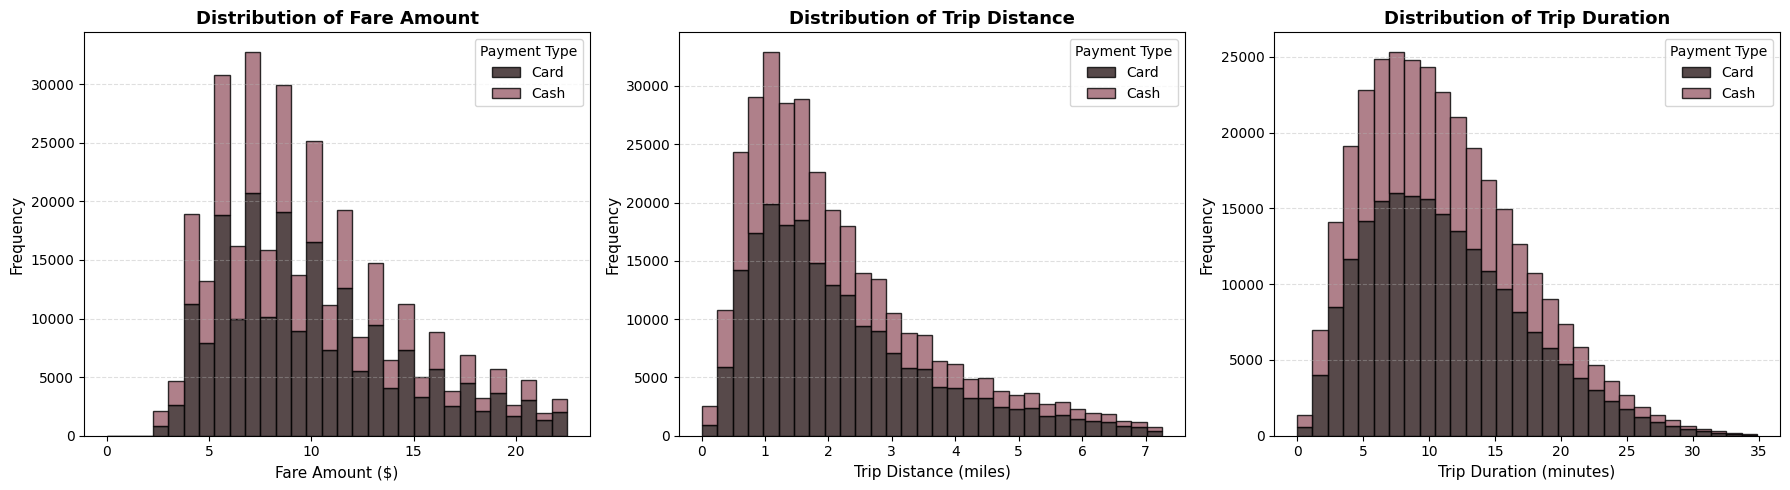

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# --- 1️⃣ Fare Amount Distribution ---
plt.subplot(1, 3, 1)
plt.hist([df[df['payment_type'] == 'Card']['fare_amount'],
           df[df['payment_type'] == 'Cash']['fare_amount']],
         bins=30, stacked=True,
        color=['#2d1b1d', '#9b606d'],
         edgecolor='black', label=['Card', 'Cash'], alpha=0.8)
plt.title('Distribution of Fare Amount', fontsize=13, fontweight='bold')
plt.xlabel('Fare Amount ($)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.legend(title='Payment Type')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# --- 2️⃣ Trip Distance Distribution ---
plt.subplot(1, 3, 2)
plt.hist([df[df['payment_type'] == 'Card']['trip_distance'],
           df[df['payment_type'] == 'Cash']['trip_distance']],
         bins=30, stacked=True,
        color=['#2d1b1d', '#9b606d'],
         edgecolor='black', label=['Card', 'Cash'], alpha=0.8)
plt.title('Distribution of Trip Distance', fontsize=13, fontweight='bold')
plt.xlabel('Trip Distance (miles)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.legend(title='Payment Type')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# --- 3️⃣ Trip Duration Distribution ---
plt.subplot(1, 3, 3)
plt.hist([df[df['payment_type'] == 'Card']['duration'],
           df[df['payment_type'] == 'Cash']['duration']],
         bins=30, stacked=True,
         color=['#2d1b1d', '#9b606d'],
         edgecolor='black', label=['Card', 'Cash'], alpha=0.8)
plt.title('Distribution of Trip Duration', fontsize=13, fontweight='bold')
plt.xlabel('Trip Duration (minutes)', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.legend(title='Payment Type')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# --- Layout Adjustment ---
plt.tight_layout()
plt.show()


x fare amount, trip distance ,duration
y total logo kitne card se pay kiya and kitno cash

all three plot show thatpayment maximum card se hui hai

In [36]:
df.groupby('payment_type').agg({
    'fare_amount': ['mean', 'std'],
    'trip_distance': ['mean', 'std'],
    "duration":['mean', 'std']
})


fare_amount           trip_distance             duration  \
                    mean       std          mean       std       mean   
payment_type                                                            
Card           10.142031  4.436452      2.190637  1.428043  11.283059   
Cash            9.822024  4.494660      2.063152  1.463377  10.957052   

                        
                   std  
payment_type            
Card          5.920432  
Cash          6.014596

💳 Card Payment

Fare mean = 10.14, std = 4.43 →
Matlab most rides ka fare (10.14 ± 4.43) → 5.7 se 14.5 ke beech hai.
Thoda variation hai, but extreme nahi.

Trip distance mean = 2.19, std = 1.43 →
Matlab rides ka distance mostly 0.8 to 3.6 miles ke beech rehta hai.

💵 Cash Payment

Fare mean = 9.82, std = 4.49 →
Matlab zyada rides ka fare 5.3 se 14.3 ke range me aata hai — Card jaise hi spread.

Trip distance mean = 2.06, std = 1.46 →
Distance bhi mostly 0.6 to 3.5 miles tak hai — Card ke almost same.

# now apan yeh pe dekh rahe kitne log cash and card use krte hai

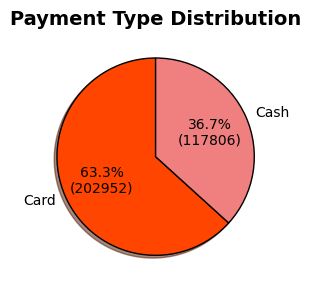

In [31]:
import matplotlib.pyplot as plt

# Count of each payment type
payment_counts = df['payment_type'].value_counts()

# Pie chart
plt.figure(figsize=(3,3))
plt.pie(payment_counts,
        labels=payment_counts.index,
        colors=['orangered', 'lightcoral'],
        startangle=90,
        shadow=True,
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(payment_counts)/100)})',
        wedgeprops={'edgecolor':'black'})

plt.title('Payment Type Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


passenger count ka  hisab vo kya use krte hai kitne log card and cash use krte ahi

ex:63.3%  toatal in card me jisme 

ex:36.7 toal cash me 

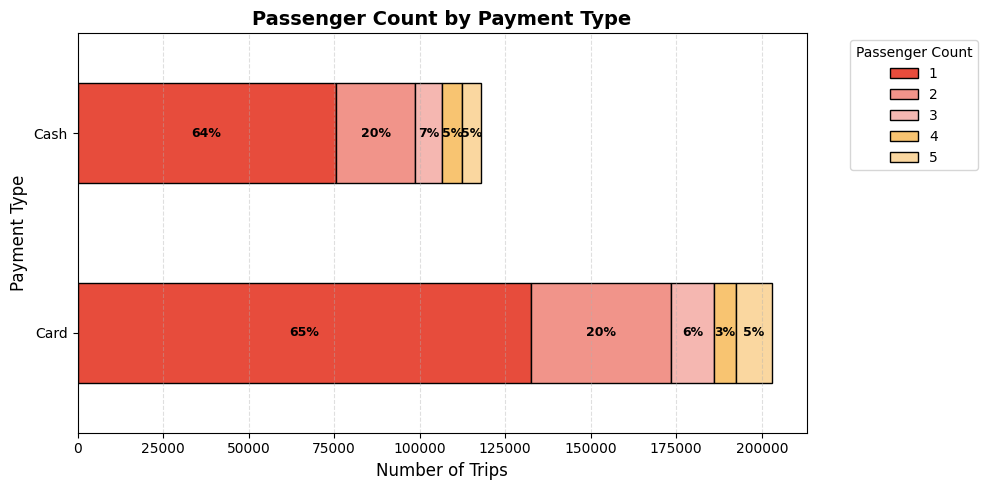

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Group by payment_type and passenger_count
payment_passenger = df.groupby(['payment_type', 'passenger_count']).size().unstack(fill_value=0)

# 2️⃣ Calculate percentage (for labels only)
payment_passenger_percent = (payment_passenger.T / payment_passenger.T.sum()) * 100
payment_passenger_percent = payment_passenger_percent.T

# 🎨 Define matching red tones (from your slide)
colors = ['#e74c3c', '#f1948a', '#f5b7b1', '#f8c471', '#fad7a0', '#f9e79f']

# 3️⃣ Horizontal stacked bar (not 100%)
fig, ax = plt.subplots(figsize=(10,5))
payment_passenger.plot(kind='barh',
                       stacked=True,
                       color=colors[:len(payment_passenger.columns)],
                       edgecolor='black',
                       ax=ax)

# 4️⃣ Add percentage labels inside bars
for i, payment in enumerate(payment_passenger.index):
    cumulative = 0
    for j, value in enumerate(payment_passenger.loc[payment]):
        percent = payment_passenger_percent.loc[payment].iloc[j]
        if value > 0:
            ax.text(cumulative + value/2, i, f'{percent:.0f}%',
                    ha='center', va='center', color='black',
                    fontsize=9, fontweight='bold')
        cumulative += value

# 5️⃣ Formatting
plt.title('Passenger Count by Payment Type', fontsize=14, fontweight='bold')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Payment Type', fontsize=12)
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



Hypothesis testing ka main use hota hai proof karna nahi, balki check karna / verify karna ki jo hum maan rahe hain (assumption) vo sahi hai ya nahi.

# START hypothiese testing

null hypothesis:there is no differnce in avg fare b/w customers who use credit cards and customers who use cash

alternative hypothesis there is a differnce in avg fare b/w customers who use credit card

# jo person card se pay krte hai sample 1 and jo customer cash krte hai sample 2 called one group means 1 group column ke under two type hai cash and card

# first 2 

Perfect Tarun 👇
Yeh short, simple aur professional notes likh le apne notebook / project ke liye:

---

### 🧩 **Central Limit Theorem (CLT)**

* CLT bolta hai ki agar sample size **bada (n ≥ 30)** ho,
  to data **normal behave karta hai**, chahe original data normal na ho.
* Matlab: large sample me **mean ka distribution** normal ban jaata hai.

---

### 📊 **Why We Used t-Test**

* Data **normally distributed nahi** tha.
* Lekin sample size **2–3 lakh** tha → **CLT apply hoti hai**.
* Isliye humne **t-test** lagaya to check mean difference between groups.
* t-test large sample ke saath **reliable** result deta hai.

---

Chahe likhne ke liye short chhodo to:

> “Data normal nahi tha but sample size large (2–3 lakh), so by Central Limit Theorem data normal behave karega — that’s why t-test is applied.”



Bilkul sahi Tarun ✅

Agar data chhota hota (sample size < 30),
to pehle check karte —
data normal hai ya nahi.

👉 Agar normal hota → t-test / z-test use karte.
👉 Agar normal nahi hota → non-parametric test (jaise Mann–Whitney, Kruskal–Wallis) use karte.

So simple line likh le:

“If sample size is small, we first check normality. If data is not normal, we use non-parametric tests instead of t-test.”

t-test means of 2 group( one column inside male and feaml called group)    cat+numeric      male with salary
z-test means of 2 group( one column inside male and feaml called group)    cat+numeric       female with salary
anova means of 3 group( one column inside male and feaml ,trans called group)    cat+numeric     male ,femal ,trans , salary

chi sqaure  (check reltaion or independence)
both cat
male  card
femal  cash   

corealtion  2 numeric me

In [33]:
# we perform t test
card_sample=df[df["payment_type"]=="Card"]["fare_amount"]
cash_sample=df[df["payment_type"]=="Cash"]["fare_amount"]

In [34]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print("T statistic",t_stats,"p-value",p_value)

T statistic 19.530633201696194 p-value 7.004381627639045e-85


p-vlaue is thier aplha se chota hai means h1 accept means h1 bolta cssh and card both me  diffence ahi if hnot hota to  diffence nothing hota means h0 reeject

In [35]:


# Correlation between fare amount and duration
correlation = df['fare_amount'].corr(df['duration'])
print("Correlation:", correlation)


Correlation: 0.9061630305966216


Correlation = 0.906
👉 Meaning:
It is very close to +1, which shows a strong positive correlation between trip duration and fare amount.
When the duration increases, the fare amount also increases —
showing a strong relationship between the two variables.
🔹 In simple words:

“The longer the trip, the higher the fare.”
This means the relationship is linear and strong.
